# Python GR-1 2020-A
------------------------------------------------------------------------------------------------------------------
# Proyecto Parte 3 

### Librerías: Pandas, Numpy, Mathplot, Scrapy
##### Realizado por: Jaramillo Rojas Ronny Xavier  
El presente informe busca presentar un proceso de web scrapping realizado a una página web que contiene información acerca de diversas películas, principalmente de la última década. Asimismo también se busca mostrar a través de distintos gráficos el contenido de un dataset construido a partir del proceso de web scrapping mencionado. Esta actividad se realiza con el fin de facilitar la interpretación de los datos contenidos en el dataset mediante el uso del lenguaje de programación Python y algunas de las librerías disponibles para el mismo.  Con esto también se prentende generar una visión más clara acerca de las películas de diversos países y su recepción a nivel mundial.  

[Enlace a la página web](https://repelis24.co/)  

## Contenido extraido de la página web  
La página web contiene información acerca de diversas películas y series de televisión, especialmente de aquellas que han sido lanzadas en la última década. En este caso, el alcance del proyecto se limita únicamente a las películas para poder realizar al final un análisis consistente de las mismas. Las películas se hallan listadas [de esta forma](https://repelis24.co/pelicula/) lo cual permite realizar un crawling de las 124 páginas en las cuales se hallan listadas las películas. Dentro de cada [película](https://repelis24.co/pelicula/trainspotting-k8ga7m/) se puede encontrar la siguiente información:  
* Título: Corresponde al título de la película. Este se adapta y/o traduce según la región.
* Título original: Corresponde al título original de la película, sin traducciones ni adaptaciones.
* Fecha inicial de lanzamiento: Corresponde a la fecha original de lanzamiento de la película.
* País: Corresponde al país en donde se originó la película.
* Duración: Corresponde a la duración o runtime total de la película.
* Rating: Corresponde al rating acuñado a cada película por la Motion Picture Association.
* Géneros: Denota los distintos géneros que comprende la película.
* Rating de IMDb: Corresponde al rating registrado en la Internet Movie Database.
* Número de votos de IMDb: Corresponde al número de votos registrados en la Internet Movie Database.
* Rating de TMDb: Corresponde al rating registrado en The Movie Database.
* Número de votos de TMDb: Corresponde al número de votos registrados en The Movie Database.
* Sinopsis: Denota una descripción sucinta de la película.  

Al realizar el web scrapping, se decidió tomar la información más destacable de cada película. Toda la información se la guarda dentro de un 'dataframe' para que posteriormente sea registrada dentro de un archivo con extensión '.csv' y pueda ser analizada.  
Para el proceso de web scrapping se decidió utilizar una araña de tipo 'CrawlSpider' ya que esta puede acceder a todas las páginas de todas las películas indexables a través de la página web. Lo que se hace es recorrer las 124 páginas de películas disponibles en la página web y dejar que la araña se encargue de obtener la información de cada página web de cada película. Se emplea una expresión regular para filtrar aquellas direcciones que contengan en su ruta la palabra 'pelicula' para que de esta manera la araña se limite a aquellas páginas que contengan la información requerida.  
Cabe resaltar que no todas las películas tienen disponible la información listada previamente por lo que fue necesario controlar todas las excepciones al extraer la información contenida en las etiquetas de cada página web para que el dataset resultante sea consistente.  
El código fuente está contenido en el archivo 'arania_mod.py' dentro del directorio 'ProyectoScrapy/arania_mod/arania_mod/spiders/' y el dataset construido está contenido en el archivo 'movies.csv' dentro del mismo directorio.

### Contenido del Dataset  Construido
El dataset construido contiene las siguientes columnas:  
* movie_name: Nombre de la película.
* release_date =  Fecha del lanzamiento inicial de la película.
* country = Páis donde se originó la película.
* runtime = Duración total de la película (en minutos).
* rating = Rating acuñado a la película por la Motion Pictura Association.
* genre = Primer género acuñado a la película.
* imdb_rating = Rating registrado en la Internet Movie Database.
* imdb_votes = Número de votos registrados en la Internet Movie Database.
* tmdb_rating = Rating registrado en The Movie Database.
* tmdb_votes = Número de votos registrados en The Movie Database

### Gráficos y análisis de resultados
**Inicio del código**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/home/nebelschwaden/Documents/2020A/PythonGR1/py-jaramillo-rojas-ronny-xavier/ProyectoScrapy/arania_mod/arania_mod/spiders/movies.csv"
columnas = ['movie_name', 'release_date', 'country', 'runtime', 'rating', 
            'genre', 'imdb_rating', 'imdb_votes', 'tmdb_rating', 'tmdb_votes']
df = pd.read_csv(
    path,
    usecols = columnas)

#for pie
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

**Número de películas por año**  
En el siguiente gráfico, se denota el número de películas que han sido lanzadas cada año. Cabe recalcar que, a raíz de que la página web no contiene información acerca de todas las películas existentes, si se puede notar que existe cierto aumento paulatino en cuanto al número de películas publicadas por año.

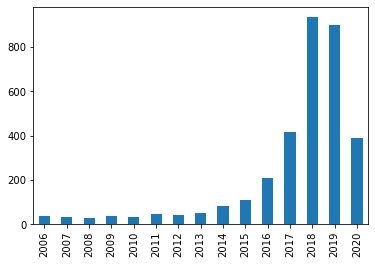

In [2]:
unique_year = df['release_date'].str.split(",\s",2).str[1]
por_year = unique_year.value_counts().head(15)
por_year = por_year.sort_index()
por_year.plot(kind='bar')

**Número de películas por mes**  
El siguiente gráfico muestra la cantidad de películas que son publicadas por mes. Se denota que las publicadoras tienen afinidad por lanzamientos a principios y finales de año. Esto también puede verse influenciado por grandes películas cuyas fechas de lanzamiento suelen ser evadidas.

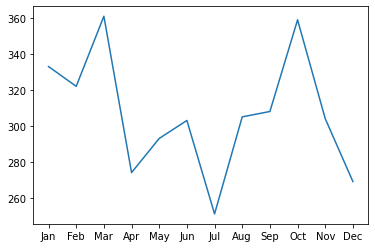

In [3]:
unique_month = df['release_date'].str.split(".",2).str[0]
por_month = unique_month.value_counts()
cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
por_month.index = pd.CategoricalIndex(por_month.index, categories=cats, ordered=True)
por_month = por_month.sort_index()
fig, ax = plt.subplots()
ax.plot(por_month.index, por_month.values) 
plt.show()

**Número de películas por rating**  
El siguiente gráfico muestra el número de películas correspondientes a diversos ratings otorgados por la MPA. Se nota que la mayor cantidad de películas caen en la categoría 'Parental Guidance Suggested' lo que significa que el contenido puede no ser apto para niños por lo que se sugiere guía paterna. La categoría que le sigue es 'Restricted' lo cual implica que, debido al contenido de estas películas, ,enores de 17 años requieren compañía de un padre o tutor adulto al momento de visualizarlas. A continuación se tiene la categoría 'Parents Strongly Cautioned' lo que implica que el contenido puede no ser apto para niños menores de 13 años. Se observa que los 'publishers' tienen una afinidad por tratar de mantenerse dentro de estas categorías.

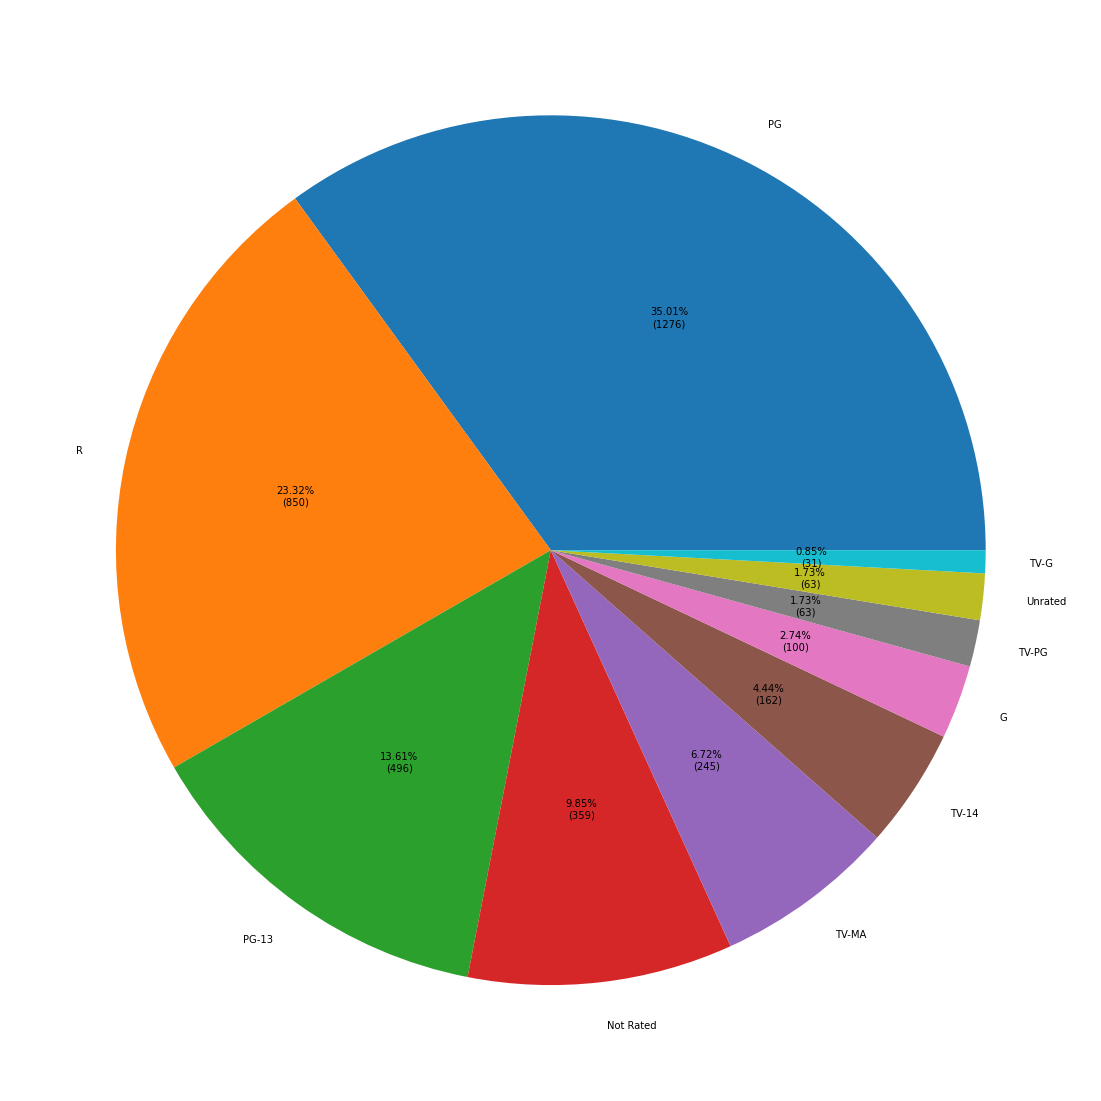

In [6]:
por_rating = df['rating'].value_counts().head(10)
pie_3 = plt.figure(figsize=(24,20))
plt.pie(por_rating.values,labels=por_rating.index,autopct=make_autopct(por_rating.values))
plt.show()

**Top 10 de países con el mayor número de películas**  
El siguiente gráfico muestra aquellos países que han publicado más películas. Evidentemente, 'USA' es el país que mayor número de películas ha producido en la última década con alrededor de 2000 películas, sobrepasando por mucho al resto de países que aparece en esta lista.

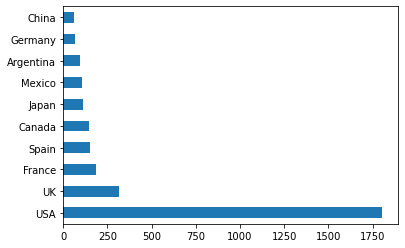

In [7]:
por_country = df['country'].value_counts().head(10)
por_country.plot(kind='barh')

**Top 15 películas con la mayor duración (en minutos)**  
En el siguiente gráfico se listan las quince películas con la mayor duración, en minutos. Se observa que la más larga registrada en la página web utilizada es 'Gone with the Wind' de 1939. También se observan algunas películas ya esperadas como la trilogía del señor de los anillos, al menos una de Coppola y al menos una de Scorsese. La última película listada corresponde a una película cuyo título original está en hindi por lo que la librería utilizada no pudo mostrar el nombre de esta.

<ipython-input-8-0cf47d0a1ea5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  por_runtime['runtime'] = por_runtime['runtime'].str.split("\s",2).str[0]
<ipython-input-8-0cf47d0a1ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  por_runtime['runtime'] = por_runtime['runtime'].apply(pd.to_numeric)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/a

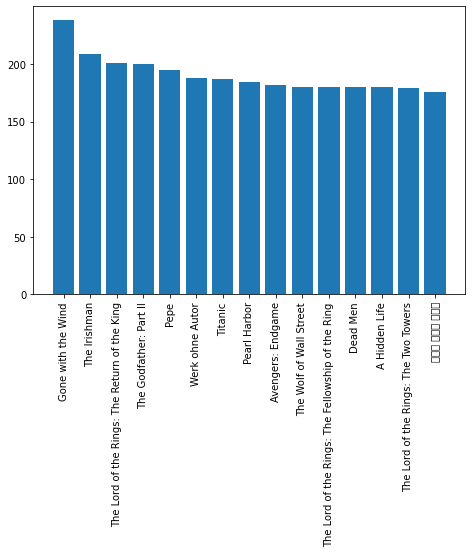

In [8]:
por_runtime = df[['movie_name','runtime']]
por_runtime['runtime'] = por_runtime['runtime'].str.split("\s",2).str[0]
por_runtime['runtime'] = por_runtime['runtime'].apply(pd.to_numeric)
por_runtime = por_runtime.sort_values(by=['runtime'], ascending=False)
por_runtime = por_runtime.head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(por_runtime['movie_name'],por_runtime['runtime'])
plt.xticks(rotation='vertical')
plt.show()

**Top 10 países con el menor número de películas**  
Se observa que en la página utilizada, de los países listados existe únicamente una película registrada. Esto no significa que cada país haya producido solamente una película sino que en la página solamente se halla un registro de una película originaria de estos países. Sin embargo, se puede denotar que estos países, de igual forma, conformarían una lista de aquellos con menos cantidad de películas producidas de todas formas.

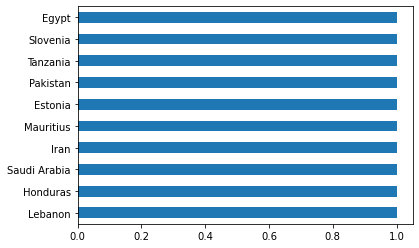

In [9]:
por_country_l = df['country'].value_counts().tail(10)
por_country_l.plot(kind='barh')

**Top 15 películas con menor duración (en minutos)**  
El el siguiente gráfico muesta aquellas películas registradas en la página web utilizada que poseen el menor tiempo de duración. Se han excluido aquellas películas cuya duración es de 30 minutos o menor ya que estas no son películas sino cortometrajes. De igual forma, la última película listada poseía un título original en un idioma no soportado por la librería utilizada por lo que no se pudo mostrarla.

<ipython-input-10-6ef21c973e35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  por_runtime_l['runtime'] = por_runtime_l['runtime'].str.split("\s",2).str[0]
<ipython-input-10-6ef21c973e35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  por_runtime_l['runtime'] = por_runtime_l['runtime'].apply(pd.to_numeric)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebe

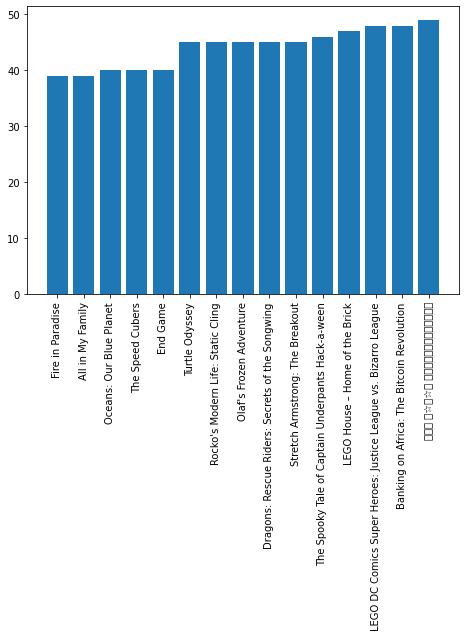

In [10]:
por_runtime_l = df[['movie_name','runtime']]
por_runtime_l['runtime'] = por_runtime_l['runtime'].str.split("\s",2).str[0]
por_runtime_l['runtime'] = por_runtime_l['runtime'].apply(pd.to_numeric)
por_runtime_l = por_runtime_l.sort_values(by=['runtime'], ascending=True).iloc[30:]
por_runtime_l = por_runtime_l.head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(por_runtime_l['movie_name'],por_runtime_l['runtime'])
plt.xticks(rotation='vertical')
plt.show()

**Top 5 géneros con mayor número de películas**  
A continuación se puede observar los géneros de películas más saturados. Se denota que existe cierta afinidad por las productoras de hacer películas de acción, drama y comedia. En la página también existía un género denominado 'Actualizadas' que corresponde a aquellas películas cuyos enlaces para ser visualizadas han sido actualizados por lo que fue descartado.

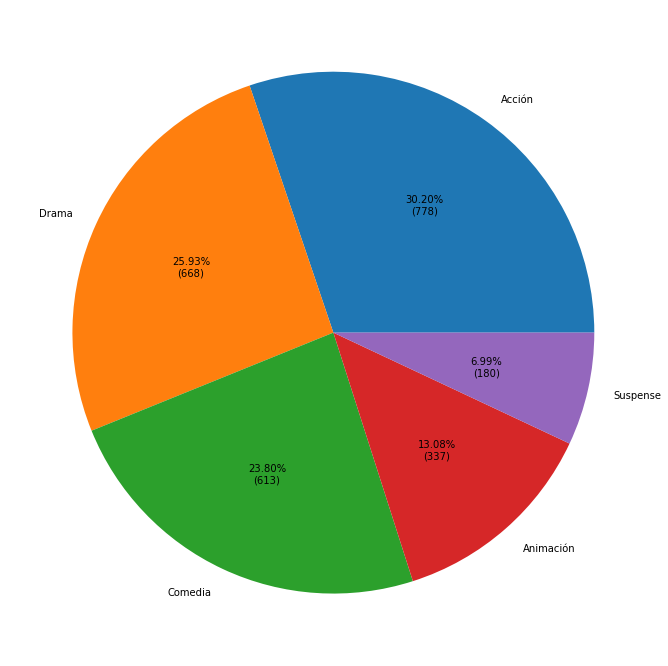

In [11]:
por_genre = df['genre'].value_counts().drop(labels=['Actualizadas'])
por_genre = por_genre.head(5)
pie_3 = plt.figure(figsize=(15,12))
plt.pie(por_genre.values,labels=por_genre.index,autopct=make_autopct(por_genre.values))
plt.show()

**Top 5 géneros con menor número de películas**  
A continuación se observan aquellos géneros que contienen menos películas dentro de la página web. En esta sección se ve que existen géneros conocidos que, sin embargo, no poseen muchos registros dentro de la página web.

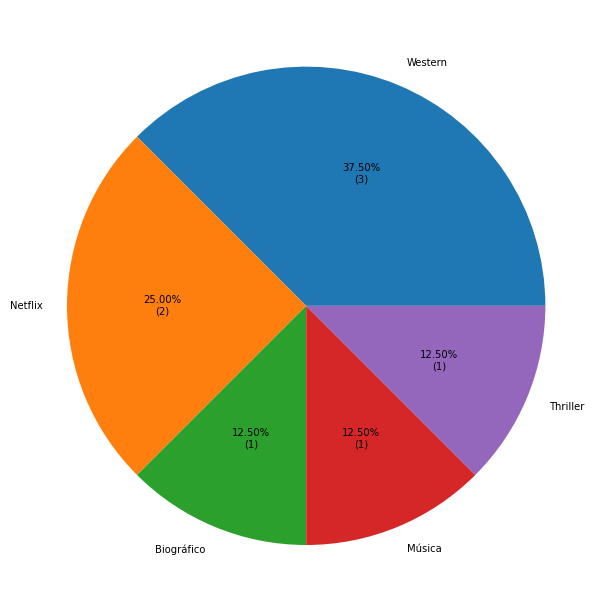

In [12]:
por_genre_l = df['genre'].value_counts().drop(labels=['Actualizadas'])
por_genre_l = por_genre_l.tail(5)
pie_3 = plt.figure(figsize=(14,11))
plt.pie(por_genre_l.values,labels=por_genre_l.index,autopct=make_autopct(por_genre_l.values))
plt.show()

**Top 15 películas con el mayo imdb rating**  
A continuación se muestran aquellas 15 películas que poseen el mayor IMDB Rating al tiempo en el que fueron agregadas a la página web utilizada. Cabe resaltar que existen películas cuyo rating no ha sido actualizado y películas que poseen un rating en IMDb alto pero que aún no han sido registradas en la página utilizada por lo que existe un poco de inconsistencia en este apartado. Sin embargo, la mayoría de ellas coinciden con la información registrada en IMDb. Aparecen dos películas cuyo título original estaban en hindi y japonés respectivamente por lo que no pueden ser mostradas en el gráfico por la librería.

/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2354 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packag

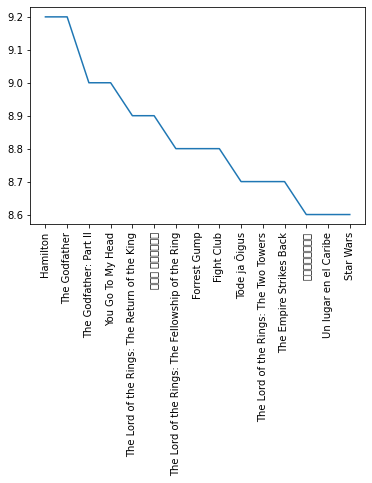

In [13]:
por_imdb_rat = df[['movie_name','imdb_rating']].sort_values(by=['imdb_rating'], ascending=False).head(15)
fig, ax = plt.subplots()
ax.plot(por_imdb_rat['movie_name'], por_imdb_rat['imdb_rating'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con la mayor cantidad de votos en IMDb**  
A continuación, se muestran aquellas películas que cuentan con el mayor número de votos dentro de la plataforma de Internet Movie Database. Evidentemente, dentro de la lista se encuentran también algunas películas que han logrado arrasar en taquilla, a excepción de la más votada "Fight Club".

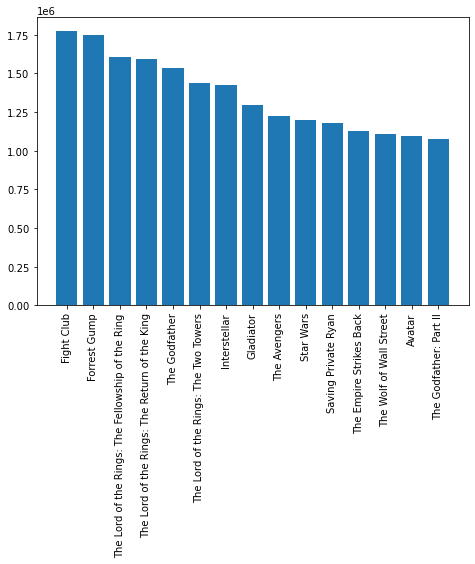

In [14]:
por_imdb_vo = df[['movie_name','imdb_votes']].sort_values(by=['imdb_votes'],ascending=False).iloc[1:]
por_imdb_vo['imdb_votes'] = por_imdb_vo['imdb_votes'].str.replace(',','')
por_imdb_vo['imdb_votes'] = por_imdb_vo['imdb_votes'].apply(pd.to_numeric)
por_imdb_vo = por_imdb_vo.sort_values(by=['imdb_votes'], ascending=False).head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(por_imdb_vo['movie_name'],por_imdb_vo['imdb_votes'])
plt.xticks(rotation='vertical')
plt.show()

**Top 10 películas con el menor IMDb rating**  
En el siguiente gráfico se listan 15 películas que poseen el peor rating dentro de la plataforma IMDb. Se muestran diversas películas con los ratings más bajos. Varias de ellas pueden llegar a ser sumamente desconocidas por el público.

/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2409 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packag

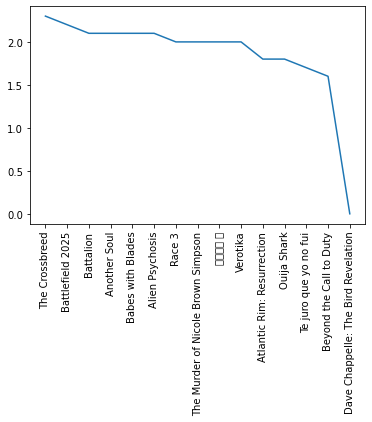

In [15]:
por_imdb_rat_l = df[['movie_name','imdb_rating']].sort_values(by=['imdb_rating'], ascending=False).tail(68).iloc[:15]
fig, ax = plt.subplots()
ax.plot(por_imdb_rat_l['movie_name'], por_imdb_rat_l['imdb_rating'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con el menor número de votos en IMDb**  
A continuación se listan las quince películas que poseen el menor número de votos registrados en IMDb. Esto implica que estas películas fueron las menor votadas por los usuarios de esta plataforma. Se espera ver películas desconocidas en esta lista.

/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33897 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26421 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22855 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 33897 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packa

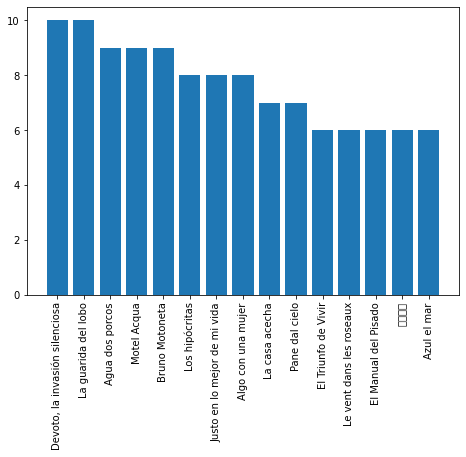

In [16]:
por_imdb_vo_l = df[['movie_name','imdb_votes']].sort_values(by=['imdb_votes'],ascending=False).iloc[1:]
por_imdb_vo_l['imdb_votes'] = por_imdb_vo_l['imdb_votes'].str.replace(',','')
por_imdb_vo_l['imdb_votes'] = por_imdb_vo_l['imdb_votes'].apply(pd.to_numeric)
por_imdb_vo_l = por_imdb_vo_l.sort_values(by=['imdb_votes'], ascending=False).tail(68).iloc[:15]
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(por_imdb_vo_l['movie_name'],por_imdb_vo_l['imdb_votes'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con el mayor rating en TMDb**  
A continuación se muestra un gráfico que contiene una lista de quince películas que han logrado obtener el mayor puntaje dentro de la plataforma The Movie Database. Se puede observar que no existen  coincidencias entre esta lista y aquella de IMDb. Esto puede deberse por el tipo de usuarios que emplea cada plataforma.

/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22075 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-p

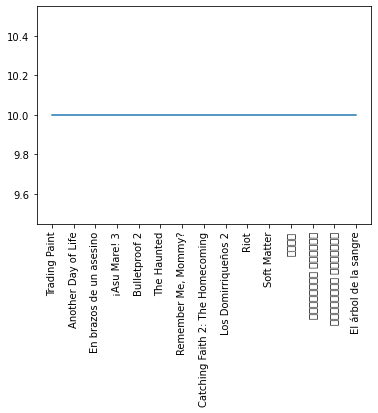

In [17]:
por_tmdb_rat = df[['movie_name','tmdb_rating']].sort_values(by=['tmdb_rating'], ascending=False).head(15)
fig, ax = plt.subplots()
ax.plot(por_tmdb_rat['movie_name'], por_tmdb_rat['tmdb_rating'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con la mayor cantidad de votos en TMDb**  
En el siguiente gráfico se puede observar las películas que más votos han acumulado dentro de la plataforma TMDb. Se denotan algunas coincidencias con la lista obtenida de la plataforma IMDb con esta. Se deduce que la plataforma IMDb es mucho más utilizada y conocida que TMDb.

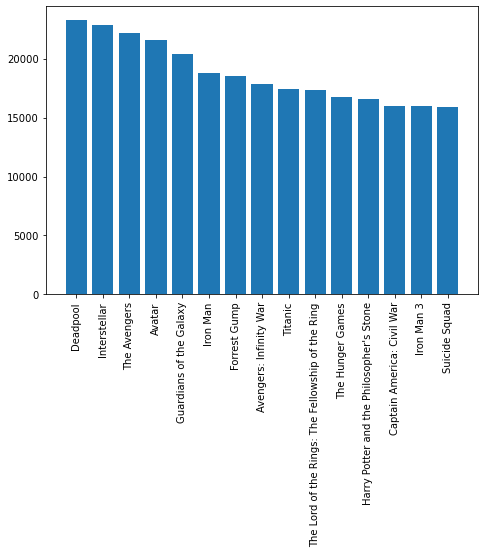

In [19]:
por_tmdb_vo = df[['movie_name','tmdb_votes']].sort_values(by=['tmdb_votes'],ascending=False)
por_tmdb_vo['tmdb_votes'] = por_tmdb_vo['tmdb_votes'].str.replace(',','')
por_tmdb_vo['tmdb_votes'] = por_tmdb_vo['tmdb_votes'].apply(pd.to_numeric)
por_tmdb_vo = por_tmdb_vo.sort_values(by=['tmdb_votes'], ascending=False).head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(por_tmdb_vo['movie_name'],por_tmdb_vo['tmdb_votes'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con el menor TMDb rating**  
A continuación se pueden observar diversas películas que han obtenido la peor puntuación dentro del portal de TMDb. Se puede denotar que no existen coincidencias entre esta lista y aquella de IMDb. Esto puede deberse a que existen menos usuarios dentro de TMDb y también pueden existir varias películas cuyos registros estén dentro de IMDb y no dentro de TMDb.

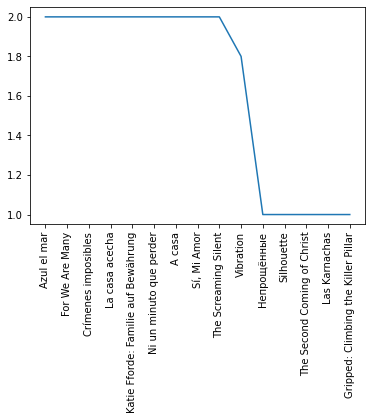

In [20]:
por_tmdb_rat_l = df[['movie_name','tmdb_rating']].sort_values(by=['tmdb_rating'], ascending=False).tail(144).iloc[:15]
fig, ax = plt.subplots()
ax.plot(por_tmdb_rat_l['movie_name'], por_tmdb_rat_l['tmdb_rating'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 películas con el menor número de votos en TMDb**  
A continuación se puede observar una lista de quince películas que contienen la menor cantidad de votos por usuarios dentro de la plataforma TMDb. Se puede observar que todas las películas con menor votos poseen al menos un voto dentro de esta plataforma.

/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12461 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12519 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/nebelschwaden/anaconda3/lib/python3.8/site-p

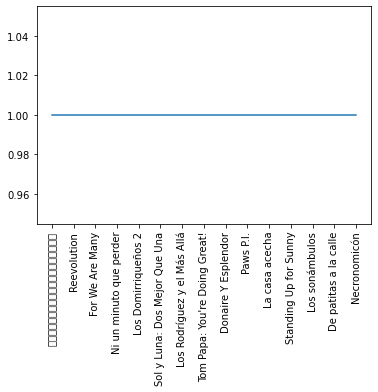

In [21]:
por_tmdb_vo_l = df[['movie_name','tmdb_votes']].sort_values(by=['tmdb_votes'],ascending=False)
por_tmdb_vo_l['tmdb_votes'] = por_tmdb_vo_l['tmdb_votes'].str.replace(',','')
por_tmdb_vo_l['tmdb_votes'] = por_tmdb_vo_l['tmdb_votes'].apply(pd.to_numeric)
por_tmdb_vo_l = por_tmdb_vo_l.sort_values(by=['tmdb_votes'], ascending=False).tail(747).iloc[:15]
fig, ax = plt.subplots()
ax.plot(por_tmdb_vo_l['movie_name'], por_tmdb_vo_l['tmdb_votes'])
plt.xticks(rotation='vertical')
plt.show()

**Top 15 países cuyas películas tienen el mayor número de votos en IMDb acumulados**  
En el siguiente gráfico se puede observar una lista de quince países cuyas películas han logrado acumular la mayor cantidad de votos dentro de la plataforma IMDb. Como es de esperarse, aquí aparecen aquellos países con las películas más populares y países que suelen producir una mayor de cantidad de películas. El claro ganador resulta ser 'USA', superando por mucho al resto.

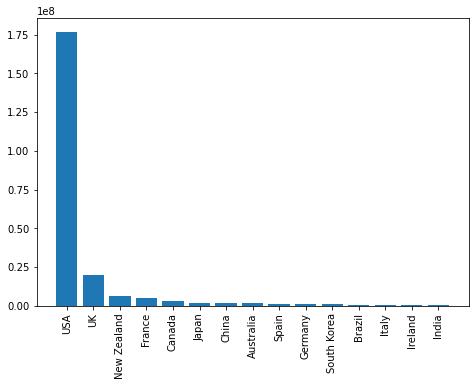

In [22]:
por_count_vo = df[['country','imdb_votes']].sort_values(by=['imdb_votes'],ascending=False)[1:]
por_count_vo['imdb_votes'] = por_count_vo['imdb_votes'].str.replace(',','')
por_count_vo['imdb_votes'] = por_count_vo['imdb_votes'].apply(pd.to_numeric)
prv = por_count_vo.groupby('country')['imdb_votes'].sum()
prv = prv.sort_values(ascending=False).head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(prv.index,prv.values)
plt.xticks(rotation='vertical')
plt.show()

**Top 15 países cuyas películas tienen el menor número de votos en IMDb acumulados**  
A continuación se listan aquellos países cuyas películas han logrado acumular el menor número de votos dentro de la plataforma de IMDb. No es sorpresa encontrar en esta lista a países que producen menos películas. Existe un registro denominado 'none' que implica aquellas películas que no tenían ningún país acuñado dentro de la página web utilizada.

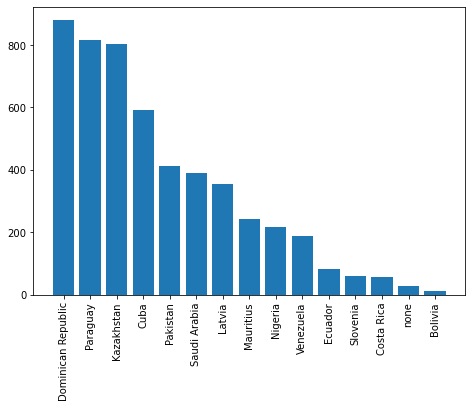

In [23]:
prvl = por_count_vo.groupby('country')['imdb_votes'].sum()
prvl = prvl.sort_values(ascending=False).tail(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(prvl.index,prvl.values)
plt.xticks(rotation='vertical')
plt.show()

**Top 15 países cuyas películas tienen el mayor número de votos en TMDb acumulados**  
En el siguiente gráfico se listan aquellos países cuyas películas han logrado acumular la mayor cantidad de votos en la plataforma de TMDb. De igual forma, esta lista coincide en cierta parte con aquella de IMDb.

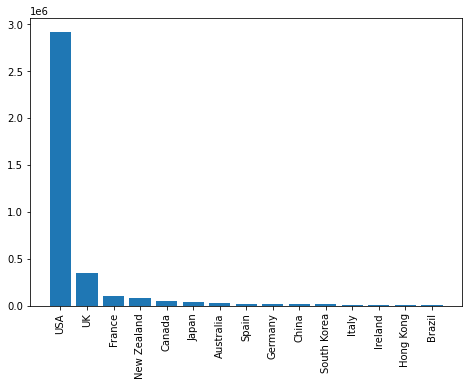

In [24]:
por_count_vo_tm = df[['country','tmdb_votes']].sort_values(by=['tmdb_votes'],ascending=False)[1:]
por_count_vo_tm['tmdb_votes'] = por_count_vo_tm['tmdb_votes'].str.replace(',','')
por_count_vo_tm['tmdb_votes'] = por_count_vo_tm['tmdb_votes'].apply(pd.to_numeric)
prvt = por_count_vo_tm.groupby('country')['tmdb_votes'].sum()
prvt = prvt.sort_values(ascending=False).head(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(prvt.index,prvt.values)
plt.xticks(rotation='vertical')
plt.show()

**Top 15 países cuyas películas tienen el menor número de votos en TMDb acumulados**  
En el siguiente y último gráfico se observan aquellos países cuyas películas han logrado acumular la menor cantidad de votos en la plataforma de TMDb. De igual forma, existen coincidencias entre esta lista y aquella de IMDb y aquí se resaltan unos países más que otros debido a la falta de popularidad que tiene esta plataforma.

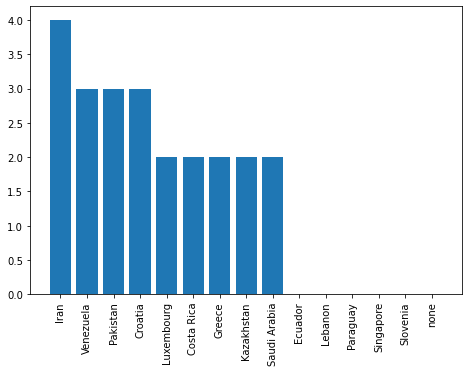

In [25]:
prvtl = por_count_vo_tm.groupby('country')['tmdb_votes'].sum()
prvtl = prvtl.sort_values(ascending=False).tail(15)
bar = plt.figure()
ax = bar.add_axes([0,0,1,1])
ax.bar(prvtl.index,prvtl.values)
plt.xticks(rotation='vertical')
plt.show()